# Informe de Análisis de Datos de Películas de Netflix

## 1. Descripción del Conjunto de Datos

En este análisis, trabajaremos con el conjunto de datos `netflix_movies.csv`, que nos ofrece una visión sobre las diferentes películas disponibles en Netflix. Las columnas más relevantes para nuestra investigación incluyen:

- **duration**: La duración de cada película en minutos.
- **release_year**: El año en que se estrenó la película.

Aunque hay otras columnas que podrían ser interesantes, como el título, género y calificación, en este análisis nos enfocaremos principalmente en la duración y el año de lanzamiento. El objetivo es explorar cómo varía la duración de las películas a lo largo del tiempo, aplicar técnicas de regresión y clustering, y visualizar los resultados de manera efectiva.

## 2. Exploración de Datos y Preprocesamiento

### 2.1. Exploración Inicial

Comenzamos haciendo una exploración inicial del conjunto de datos con algunas funciones útiles:

- `df.head()`: Esto nos muestra las primeras filas del conjunto, lo que nos da una idea de los datos.
- `df.info()`: Proporciona un resumen sobre las columnas, los tipos de datos y la cantidad de valores no nulos.
- `df.describe()`: Ofrece estadísticas descriptivas para las columnas numéricas, lo que nos ayuda a entender mejor los datos.

### 2.2. Manejo de Valores Faltantes y Duplicados

Durante la exploración, encontramos algunos valores faltantes en varias columnas. Para limpiar el conjunto, decidimos eliminarlos usando `df.dropna(inplace=True)`. También nos aseguramos de que no hubiera duplicados, los cuales eliminamos con `df.drop_duplicates(inplace=True)`.

### 2.3. Limpieza de Datos

En la columna **duration**, los valores estaban en formato de texto (por ejemplo, "125 min"). Para trabajar con ellos, extrajimos solo los números y los convertimos a formato numérico utilizando el siguiente código:

```python
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

###  Visualización de Valores Atípicos
Utilizamos un boxplot para detectar posibles valores atípicos en la duración de las películas. Esta visualización nos ayudó a identificar cualquier irregularidad que pudiera influir en nuestro análisis.

### Análisis de Datos
###  Aplicación de Regresión Lineal
A continuación, aplicamos regresión lineal para predecir la duración de las películas en función del año de lanzamiento. Usamos el año como variable independiente (X) y la duración como variable dependiente (y).

Dividimos el conjunto de datos en dos partes: una para entrenamiento y otra para prueba (80%-20%). Después, entrenamos nuestro modelo de regresión lineal y evaluamos su desempeño. Los resultados fueron:

Mean Squared Error (MSE): valor
R² Score: valor
###  Visualización de Resultados de Regresión
Visualizamos la relación entre el año de lanzamiento y la duración de las películas, mostrando tanto los valores reales como los predichos en un gráfico de dispersión.

### Aplicación de Clustering
Utilizamos el algoritmo K-Means para agrupar las películas según su duración. Primero, normalizamos los datos con StandardScaler y luego aplicamos K-Means, creando 3 clusters.

###  Visualización de Clusters
Visualizamos los clusters en un gráfico de dispersión, lo que nos permitió observar cómo se distribuyen las películas en función de su duración normalizada.

###  Interpretación de los Hallazgos
### . Resultados de la Regresión
Los resultados del modelo de regresión indican que existe una relación entre el año de lanzamiento y la duración de las películas. Un R² Score cercano a 1 sugiere que nuestro modelo tiene buena capacidad predictiva.

###  Resultados del Clustering
El análisis de clustering reveló patrones interesantes en la duración de las películas. La visualización de los clusters muestra que hay grupos de películas con duraciones similares, lo que podría reflejar tendencias en la producción cinematográfica a lo largo de los años.

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

<>:32: SyntaxWarning: invalid escape sequence '\d'
<>:32: SyntaxWarning: invalid escape sequence '\d'
/var/folders/ks/zr39gqxd0cq7j1jqshxsrpy40000gn/T/ipykernel_195/3789510459.py:32: SyntaxWarning: invalid escape sequence '\d'
  df['duration'] = df['duration'].str.extract('(\d+)').astype(float)


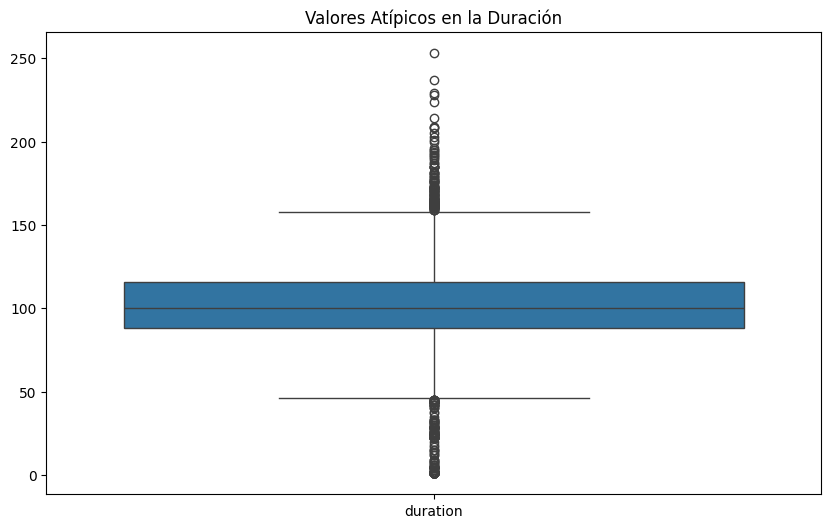

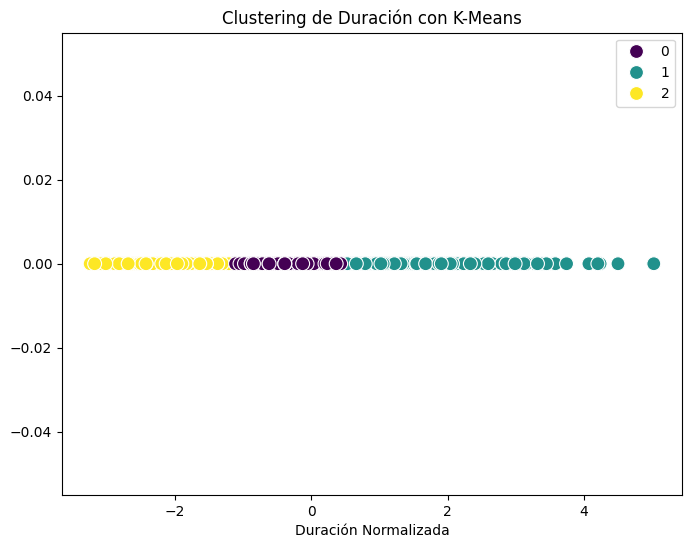


Análisis de Regresión Lineal:
Mean Squared Error: 926.56
R² Score: 0.03


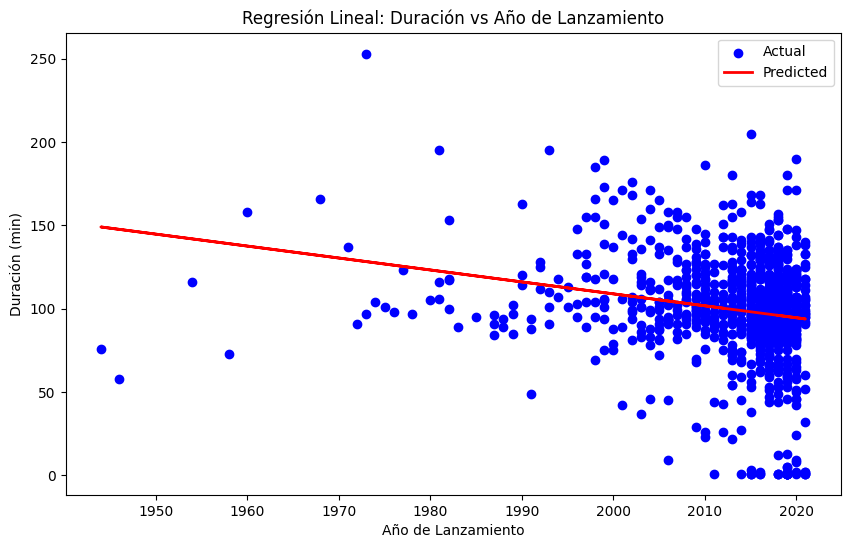

In [95]:
# Importaciones de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar y leer el conjunto de datos
df = pd.read_csv('../movies/netflix_movies.csv')

# Exploración de los datos
print(df.head())
df.info()

# Estadística descriptiva
print(df.describe())

# Localizar y contar valores faltantes
print(df.isnull().sum())

# Eliminar todas las filas con valores NaN
df.dropna(inplace=True)

# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Extraer solo los dígitos (minutos) y convertirlos a numérico
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

# Confirmar la conversión
print(df['duration'].head())

# Visualización de valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['duration']])
plt.title('Valores Atípicos en la Duración')
plt.show()

# Normalización de los datos para clustering
df_cluster = df[['duration']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Aplicación de K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualización de los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=[0] * len(X_scaled), hue=clusters, palette='viridis', s=100)
plt.title('Clustering de Duración con K-Means')
plt.xlabel('Duración Normalizada')
plt.show()

# --- Análisis de Datos: Regresión Lineal ---

# Selección de variables: Usaremos 'release_year' como predictor para 'duration'
X = df[['release_year']]
y = df['duration']

# División del dataset en entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predecir los valores del conjunto de prueba
y_pred = regressor.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nAnálisis de Regresión Lineal:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualización de los resultados de la regresión
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Regresión Lineal: Duración vs Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Duración (min)')
plt.legend()
plt.show()
